#### Composite variables centered at MCS centroids at different MCS phases

In [1]:
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from datetime import datetime
from pathlib import Path
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings

# import theta_e_calc 
from theta_e_calc_mod import *

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# set fonts configuration - Arial
matplotlib.rcParams['font.family'] = "Open Sans"
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [63]:
# directory of the mcs_3dvars files

year = 2014
dir_envs_track = Path('/neelin2020/mcs_flextrkr/mcs_stats/envs_track/{}/totp_defined/'.format(year))
files = sorted(list(dir_envs_track.glob('*.nc')))

dir_stats_track = Path('/neelin2020/mcs_flextrkr/mcs_stats/'.format(year))
data_track = xr.open_dataset(dir_stats_track / 'mcs_tracks_non2mcs_2014.IndoPacific.nc')

In [54]:
%%time
# merge all files into one
ds_list = []
for file in files: 
    ds = xr.open_dataset(file)
    ds_list.append(ds)
    
data_merged_xr = xr.concat(ds_list, dim=pd.Index(np.arange(len(files)), name='tracks'))

CPU times: user 1min 50s, sys: 20.5 s, total: 2min 11s
Wall time: 3min 50s


In [74]:
%%time
# generate stats at defined MCS phases from data_non2mcs_track

data_track_phase = xr.concat([data_track.sel(times=data_track.idt_mcs_init),
                              data_track.sel(times=data_track.idt_mcs_grow),
                              data_track.sel(times=data_track.idt_mcs_mature),
                              data_track.sel(times=data_track.idt_mcs_decay),
                              data_track.sel(times=data_track.idt_mcs_end)],
                              dim = pd.Index(data_merged_xr.mcs_phase.values, name='mcs_phase'))

CPU times: user 1min 36s, sys: 263 ms, total: 1min 37s
Wall time: 1min 37s


In [127]:
# get some composite varialbes 
prec_gpm_compos = data_merged_xr.precipitationCal.mean('tracks')
prec_era5_compos = data_merged_xr.mtpr.mean('tracks')

omega850_compos = (data_merged_xr.w.sel(level=850, method='nearest')).mean('tracks')
omega500_compos = (data_merged_xr.w.sel(level=500, method='nearest')).mean('tracks')
u850_compos = (data_merged_xr.u.sel(level=850, method='nearest')).mean('tracks')
v850_compos = (data_merged_xr.v.sel(level=850, method='nearest')).mean('tracks')
T850_compos = (data_merged_xr.t.sel(level=850, method='nearest')).mean('tracks')
q850_compos = (data_merged_xr.q.sel(level=850, method='nearest')).mean('tracks')
q500_compos = (data_merged_xr.q.sel(level=500, method='nearest')).mean('tracks')

# upper level
u500_compos = (data_merged_xr.u.sel(level=500, method='nearest')).mean('tracks')
v500_compos = (data_merged_xr.v.sel(level=500, method='nearest')).mean('tracks')
u200_compos = (data_merged_xr.u.sel(level=200, method='nearest')).mean('tracks')
v200_compos = (data_merged_xr.v.sel(level=200, method='nearest')).mean('tracks')

BL_TOT_compos = data_merged_xr.BL_TOT.mean('tracks')/3 # add the factor back
BL_CAPE_compos = data_merged_xr.BL_CAPE.mean('tracks')/3 
BL_SUBSAT_compos = data_merged_xr.BL_SUBSAT.mean('tracks')/3 

In [56]:
mcsmask_compos = data_merged_xr.cloudtracknumber_nomergesplit.mean('tracks')

Text(0.5, 1.05, 'Composite precipitation: GPM-IMERG (0.25-deg)')

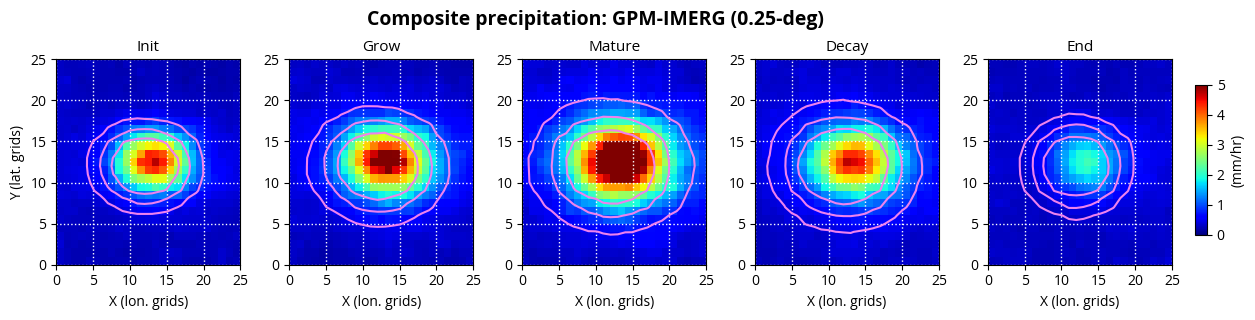

In [57]:
fig, ax = plt.subplots(1,5,figsize=(12,3))

for n,phase in enumerate(prec_gpm_compos.mcs_phase.values):
    
    cp = ax[n].pcolormesh(prec_gpm_compos.sel(mcs_phase=phase), vmin=0, vmax=5, cmap='jet')
    # add composite mask position
    ax[n].contour(mcsmask_compos.sel(mcs_phase=phase), levels=[0.25,0.5,0.75], colors=['violet'])
    ax[n].set_title('{}'.format(phase),fontsize=11)
    ax[n].set_xlabel('X (lon. grids)')
    
    if n == 0:
        ax[n].set_ylabel('Y (lat. grids)')
        
    ax[n].set_xticks(np.arange(0,30,5))
    ax[n].grid(linestyle=':', linewidth=1, color='w')
    
    if n == 4:
        cbaxes = fig.add_axes([1, 0.3, 0.01, 0.5])
        cbar = plt.colorbar(cp,cbaxes)
        cbar.set_label('(mm/hr)')
    
plt.tight_layout()
plt.suptitle('Composite precipitation: GPM-IMERG (0.25-deg)',fontsize=14, fontweight='bold', y=1.05)

Text(0.5, 1.05, 'Composite precipitation: ERA-5')

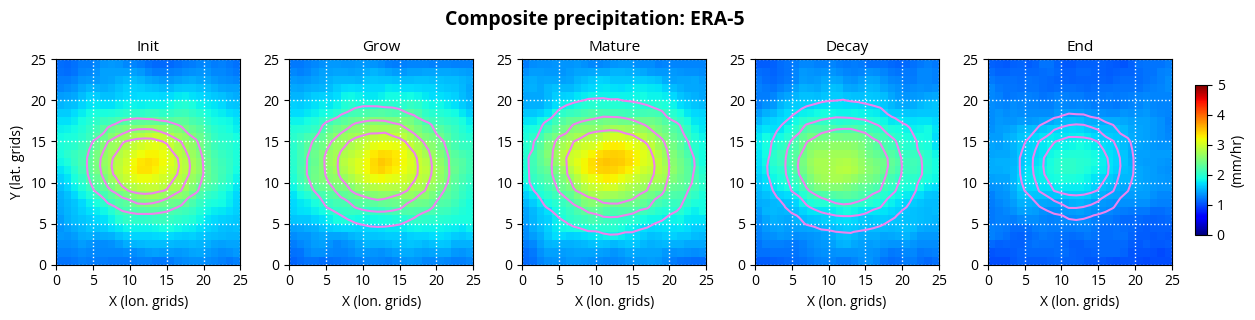

In [58]:
fig, ax = plt.subplots(1,5,figsize=(12,3))

for n,phase in enumerate(prec_era5_compos.mcs_phase.values):
    
    ax[n].pcolormesh(prec_era5_compos.sel(mcs_phase=phase), vmin=0, vmax=1.5, cmap='jet')
    # add composite mask position
    ax[n].contour(mcsmask_compos.sel(mcs_phase=phase), levels=[0.25,0.5,0.75], colors=['violet'])
    ax[n].set_title('{}'.format(phase),fontsize=11)
    ax[n].set_xlabel('X (lon. grids)')
    
    if n == 0:
        ax[n].set_ylabel('Y (lat. grids)')
        
    ax[n].set_xticks(np.arange(0,30,5))
    ax[n].grid(linestyle=':', linewidth=1, color='w')
    
    if n == 4:
        cbaxes = fig.add_axes([1, 0.3, 0.01, 0.5])
        cbar = plt.colorbar(cp,cbaxes)
        cbar.set_label('(mm/hr)')
    
plt.tight_layout()
plt.suptitle('Composite precipitation: ERA-5',fontsize=14, fontweight='bold', y=1.05)

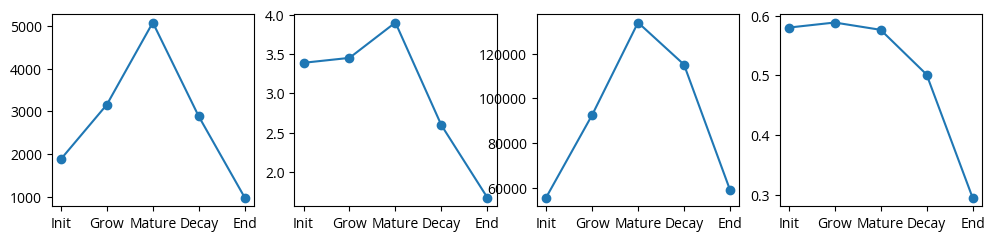

In [122]:
# plot total precip, area-averaged precip, area at MCS phases, core cloud fraction

fig,ax = plt.subplots(1,4,figsize=(12,2.5))

ax[0].plot(data_track_phase.mcs_phase, data_track_phase.total_rain.mean('tracks').values, 
         marker='o')
ax[1].plot(data_track_phase.mcs_phase, (data_track_phase.total_rain/(data_track_phase.area/100)).mean('tracks').values, 
         marker='o')
ax[2].plot(data_track_phase.mcs_phase, data_track_phase.area.mean('tracks').values, 
         marker='o')
ax[3].plot(data_track_phase.mcs_phase, (data_track_phase.core_area/data_track_phase.area).mean('tracks').values, 
         marker='o')

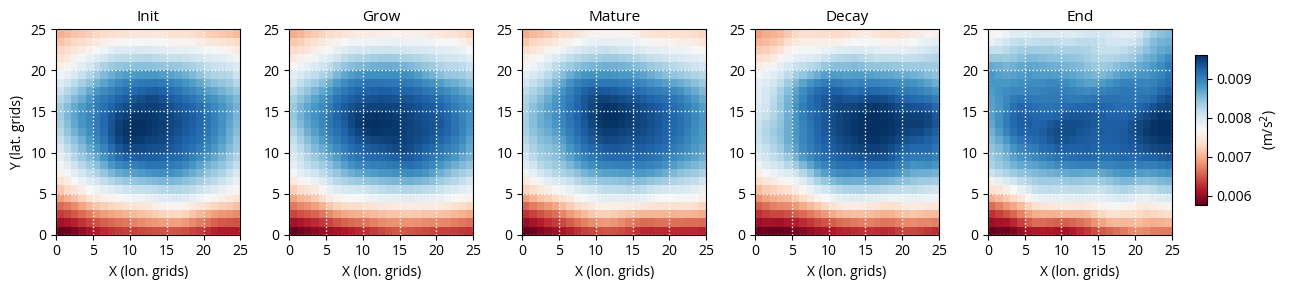

In [131]:
fig, ax = plt.subplots(1,5,figsize=(12,3))

for n,phase in enumerate(BL_CAPE_compos.mcs_phase.values):
    
    cp = ax[n].pcolormesh(BL_CAPE_compos.sel(mcs_phase=phase), cmap='RdBu')
    
    ax[n].set_title('{}'.format(phase),fontsize=11)
    ax[n].set_xlabel('X (lon. grids)')
    
    if n == 0:
        ax[n].set_ylabel('Y (lat. grids)')
    ax[n].set_xticks(np.arange(0,30,5))
    ax[n].grid(linestyle=':', linewidth=1, color='w')    
    
    if n == 4:
        cbaxes = fig.add_axes([1, 0.3, 0.01, 0.5])
        cbar = plt.colorbar(cp,cbaxes)
        cbar.set_label('(m/s$^2$)')
plt.tight_layout()

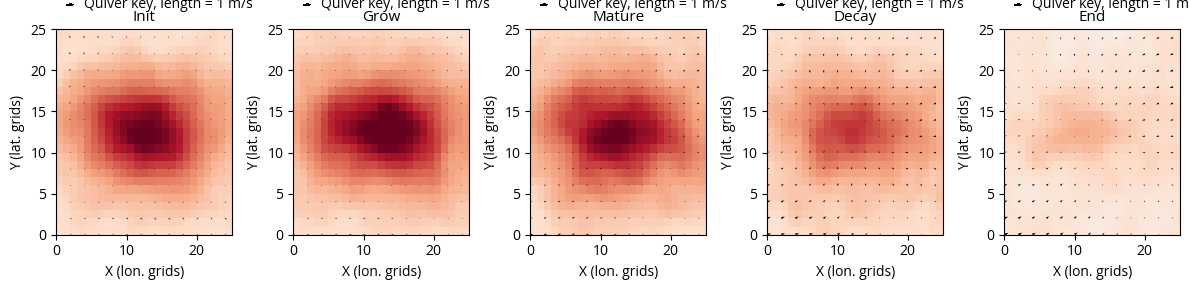

In [117]:
fig, ax = plt.subplots(1,5,figsize=(12,3))

# set the key length
lkey=1

#set the scale factor
scalef=1

for n,phase in enumerate(omega500_compos.mcs_phase.values):
    
    ax[n].pcolormesh(omega500_compos.sel(mcs_phase=phase), vmin=-0.3, vmax=0.3, cmap='RdBu')
    q1 = ax[n].quiver(u500_compos.x[::2], u500_compos.y[::2]
               , (u500_compos.sel(mcs_phase=phase)-u500_compos.sel(mcs_phase=phase).mean())[::2,::2]
               , (v500_compos.sel(mcs_phase=phase)-v500_compos.sel(mcs_phase=phase).mean())[::2,::2],
                angles='xy', scale_units='xy' , scale=scalef)
    ax[n].quiverkey(q1, X=0.1, Y=1.12, U=lkey,
             label='Quiver key, length = '+str(lkey)+' m/s', labelpos='E')
    
    ax[n].set_title('{}'.format(phase),fontsize=11)
    ax[n].set_xlabel('X (lon. grids)')
    ax[n].set_ylabel('Y (lat. grids)')
    
plt.tight_layout()

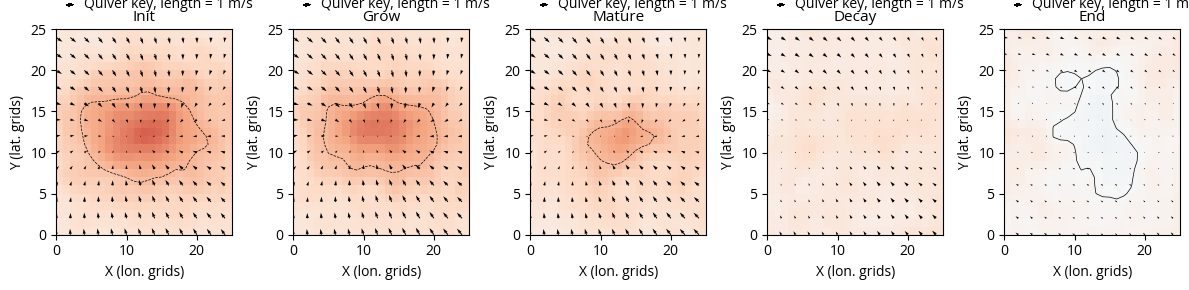

In [115]:
# low level- 850 hPa
fig, ax = plt.subplots(1,5,figsize=(12,3))

# set the key length
lkey=1

#set the scale factor
scalef=1

for n,phase in enumerate(omega850_compos.mcs_phase.values):
    
    ax[n].pcolormesh(omega850_compos.sel(mcs_phase=phase), vmin=-0.3, vmax=0.3, cmap='RdBu')
    ax[n].contour(omega850_compos.sel(mcs_phase=phase), levels=np.arange(-0.3,0.4,0.1), colors=['k'],
                 linewidths=0.5)
    q1 = ax[n].quiver(u200_compos.x[::2], u200_compos.y[::2]
               , (u850_compos.sel(mcs_phase=phase)-u850_compos.sel(mcs_phase=phase).mean())[::2,::2]
               , (v850_compos.sel(mcs_phase=phase)-v850_compos.sel(mcs_phase=phase).mean())[::2,::2],
                angles='xy', scale_units='xy' , scale=scalef, width=0.006)
    ax[n].quiverkey(q1, X=0.1, Y=1.12, U=lkey,
             label='Quiver key, length = '+str(lkey)+' m/s', labelpos='E')

    ax[n].set_title('{}'.format(phase),fontsize=11)
    ax[n].set_xlabel('X (lon. grids)')
    ax[n].set_ylabel('Y (lat. grids)')
    
plt.tight_layout()

#### composite as a function of grid locations: inside, boundary, outside

In [133]:
%%time

data_mask_loclabel = []

for file in files:

    data_test = xr.open_dataset(file)
    
    # location labeling: inside, boundary, outside
    
    mask_loclabel_phase = []
    for p, phase in enumerate(data_test.mcs_phase.values):
        
        data_phase = data_test.sel(mcs_phase=phase)

        mask = data_test.cloudtracknumber_nomergesplit.sel(mcs_phase=phase)
        mask_xdiff = mask.differentiate(coord='x')
        mask_ydiff = mask.differentiate(coord='y')

        mask_totdiff = (mask_ydiff+mask_xdiff)
        mask_bound = mask_totdiff.where(abs(mask_totdiff) > 0 & (mask == 0), 0)
        mask_bound = mask_bound.where(mask_bound == 0, 2)
        mask_inside = mask.where((mask == 1) & (mask_bound == 0), 0)
        mask_outside = mask.where((mask == 0) & (mask_bound == 0), 0)

        # merge into a final mask (0: oustide, 1: inside, 2: boundary)
        mask_loclabel = mask_bound + mask_inside + mask_outside
        mask_loclabel_phase.append(mask_loclabel)
    
    data_mask_loclabel.append(xr.concat(mask_loclabel_phase, dim=pd.Index(data_test.mcs_phase.values, name='mcs_phase')))
    
data_mask_loclabel_xr = xr.concat(data_mask_loclabel, dim=pd.Index(data_merged_xr.tracks.values, name='tracks'))
data_mask_loclabel_xr = data_mask_loclabel_xr.to_dataset().rename({'cloudtracknumber_nomergesplit': 'region_label'})

# add region label (inside, boundary, outside) into the merged mcs_envs dataset
data_merged_fnl_xr = xr.merge([data_merged_xr, data_mask_loclabel_xr])

# add thetae and thetae_sat profiles
data_thetae_xr = theta_e_calc(data_merged_fnl_xr.t, data_merged_fnl_xr.q)
data_qs_xr =qs_calc(data_merged_fnl_xr.t)
data_thetae_sat_xr = theta_e_calc(data_merged_fnl_xr.t, data_qs_xr)

data_merged_fnl_xr = xr.merge([data_merged_fnl_xr, data_thetae_xr.rename('thetae')
                               , data_thetae_sat_xr.rename('thetae_sat')])

CPU times: user 2min, sys: 41.9 s, total: 2min 42s
Wall time: 2min 44s


In [134]:
%%time
# region-averaged values
data_merged_inside = data_merged_fnl_xr.where(data_merged_fnl_xr.region_label == 1).mean(('x','y'))
data_merged_boundary = data_merged_fnl_xr.where(data_merged_fnl_xr.region_label == 2).mean(('x','y'))
data_merged_outside = data_merged_fnl_xr.where(data_merged_fnl_xr.region_label == 0).mean(('x','y'))

CPU times: user 24.9 s, sys: 30.3 s, total: 55.2 s
Wall time: 55.4 s


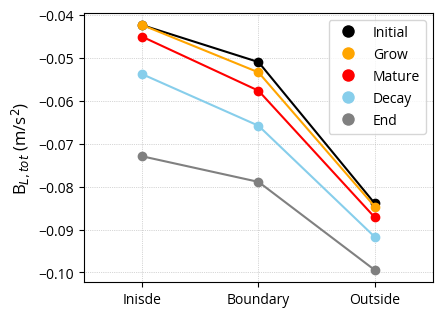

In [153]:
fig = plt.figure(figsize=(4.5,3.5))

ccolors = ['k','orange','r','skyblue','grey']

for p, phase in enumerate(data_test.mcs_phase.values):
    
    BL_in = data_merged_inside.BL_TOT.sel(mcs_phase = phase).mean('tracks')
    BL_bd = data_merged_boundary.BL_TOT.sel(mcs_phase = phase).mean('tracks')
    BL_out = data_merged_outside.BL_TOT.sel(mcs_phase = phase).mean('tracks')
    
    plt.plot([0,1,2], [BL_in, BL_bd, BL_out], color=ccolors[p], marker='o')
    #plt.scatter(1, BL_bd, color=ccolors[p])
    #plt.scatter(2, BL_out, color=ccolors[p])
        
plt.xticks([0,1,2],['Inisde','Boundary','Outside'])
plt.xlim([-0.5,2.5]);
plt.ylabel('B$_{L,tot}$ (m/s$^2$)', fontsize=12)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Initial',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Grow',
                          markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Mature',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Decay',
                          markerfacecolor='skyblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='End',
                          markerfacecolor='grey', markersize=10),]

plt.legend(handles=legend_elements)
plt.grid(linestyle=':', linewidth=0.5)

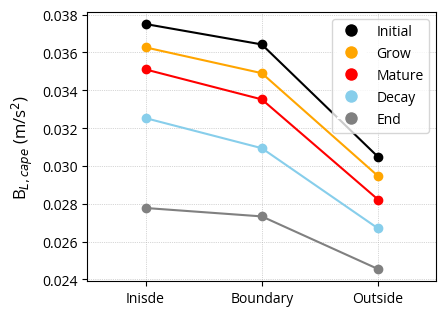

In [154]:
fig = plt.figure(figsize=(4.5,3.5))

ccolors = ['k','orange','r','skyblue','grey']

for p, phase in enumerate(data_test.mcs_phase.values):
    
    BL_in = data_merged_inside.BL_CAPE.sel(mcs_phase = phase).mean('tracks')
    BL_bd = data_merged_boundary.BL_CAPE.sel(mcs_phase = phase).mean('tracks')
    BL_out = data_merged_outside.BL_CAPE.sel(mcs_phase = phase).mean('tracks')
    
    plt.plot([0,1,2], [BL_in, BL_bd, BL_out], color=ccolors[p], marker='o')
    #plt.scatter(1, BL_bd, color=ccolors[p])
    #plt.scatter(2, BL_out, color=ccolors[p])
        
plt.xticks([0,1,2],['Inisde','Boundary','Outside'])
plt.xlim([-0.5,2.5]);
plt.ylabel('B$_{L,cape}$ (m/s$^2$)', fontsize=12)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Initial',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Grow',
                          markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Mature',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Decay',
                          markerfacecolor='skyblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='End',
                          markerfacecolor='grey', markersize=10),]

plt.legend(handles=legend_elements)
plt.grid(linestyle=':', linewidth=0.5)

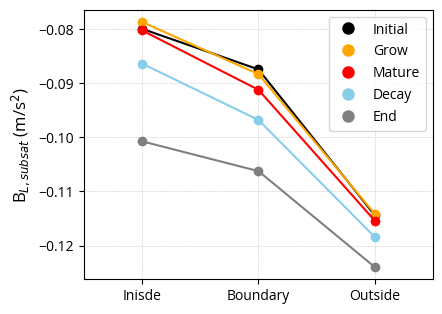

In [156]:
fig = plt.figure(figsize=(4.5,3.5))

ccolors = ['k','orange','r','skyblue','grey']

for p, phase in enumerate(data_test.mcs_phase.values):
    
    BL_in = -data_merged_inside.BL_SUBSAT.sel(mcs_phase = phase).mean('tracks')
    BL_bd = -data_merged_boundary.BL_SUBSAT.sel(mcs_phase = phase).mean('tracks')
    BL_out = -data_merged_outside.BL_SUBSAT.sel(mcs_phase = phase).mean('tracks')
    
    plt.plot([0,1,2], [BL_in, BL_bd, BL_out], color=ccolors[p], marker='o')
    #plt.scatter(1, BL_bd, color=ccolors[p])
    #plt.scatter(2, BL_out, color=ccolors[p])
        
plt.xticks([0,1,2],['Inisde','Boundary','Outside'])
plt.xlim([-0.5,2.5]);
plt.ylabel('B$_{L,subsat}$ (m/s$^2$)', fontsize=12)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Initial',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Grow',
                          markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Mature',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Decay',
                          markerfacecolor='skyblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='End',
                          markerfacecolor='grey', markersize=10),]

plt.legend(handles=legend_elements)
plt.grid(linestyle=':', linewidth=0.5)

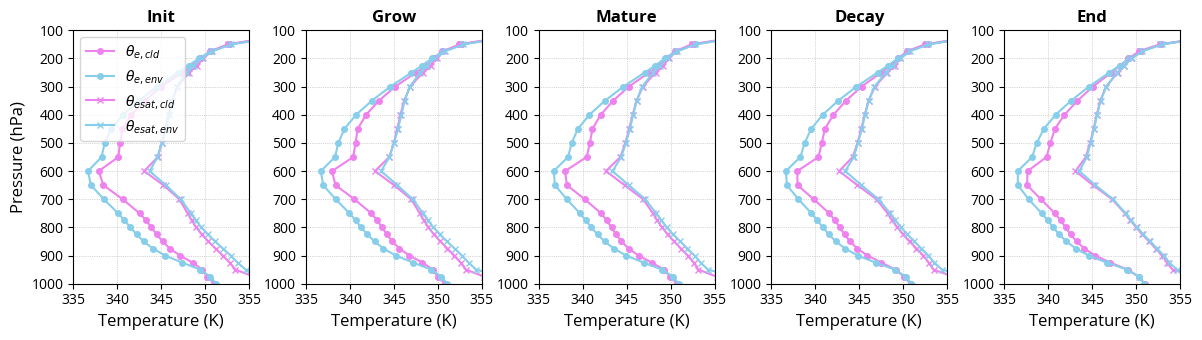

In [184]:
fig, ax = plt.subplots(1,5,figsize=(12,3.5))

ccolors = ['k','orange','r','skyblue','grey']

for p, phase in enumerate(data_test.mcs_phase.values):
    
    thetae_in = data_merged_inside.thetae.sel(mcs_phase = phase).mean('tracks')
    thetae_sat_in = data_merged_inside.thetae_sat.sel(mcs_phase = phase).mean('tracks')
    #thetae_bd = data_merged_boundary.thetae.sel(mcs_phase = phase).mean('tracks')
    thetae_out = data_merged_outside.thetae.sel(mcs_phase = phase).mean('tracks')
    thetae_sat_out = data_merged_outside.thetae_sat.sel(mcs_phase = phase).mean('tracks')
    
    ax[p].plot(thetae_in, thetae_in.level, color='violet', marker='o', markersize=4, label=r'$\theta_{e,cld}$')
    #ax[p].plot(thetae_bd, thetae_bd.level, color='grey', marker='o', markersize=4)
    ax[p].plot(thetae_out, thetae_out.level, color='skyblue', marker='o', markersize=4, label=r'$\theta_{e,env}$')
    # thetae_sat inside/outside MCS
    ax[p].plot(thetae_sat_in, thetae_sat_in.level, color='violet', marker='x', markersize=4, label=r'$\theta_{esat, cld}$')
    ax[p].plot(thetae_sat_out, thetae_sat_out.level, color='skyblue', marker='x', markersize=4, label=r'$\theta_{esat, env}$')

    if p == 0:
        ax[p].set_ylabel('Pressure (hPa)', fontsize=12)
        ax[p].legend(loc=2, fontsize=10)

    ax[p].set_ylim([1000,100])
    ax[p].set_xlim([335,355])
    ax[p].grid(linestyle=':', linewidth=0.5)
    ax[p].set_xlabel('Temperature (K)', fontsize=12)
    ax[p].set_title(phase, fontsize=12, fontweight='bold')
    
plt.tight_layout()

#### one case study 

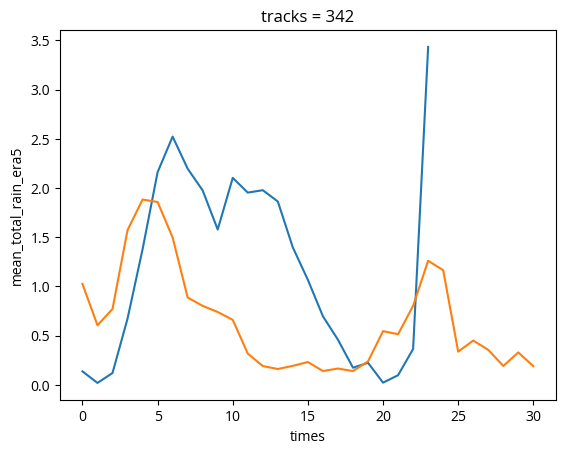

In [225]:
track_sel = 11
(data_track.isel(tracks=track_sel).total_rain/(data_track.isel(tracks=0).area/100)).plot()
data_track.isel(tracks=track_sel).mean_total_rain_era5.plot()

Text(0.5, 1.05, 'Precipitation: GPM-IMERG (0.25-deg)')

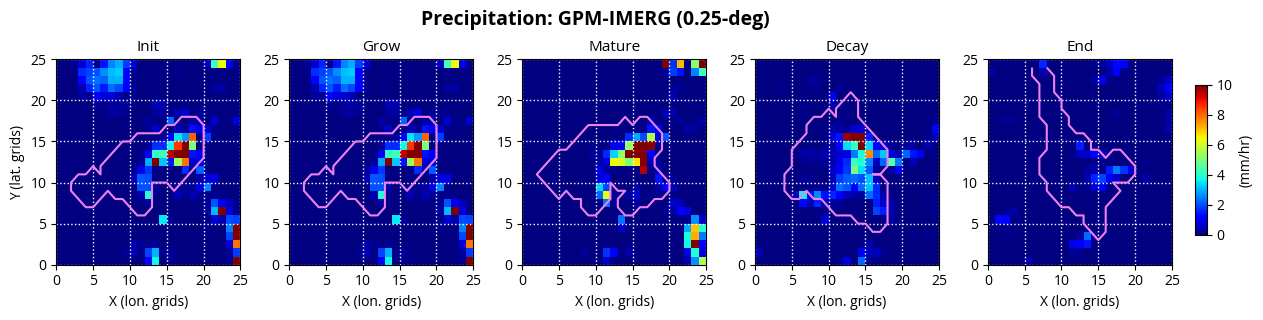

In [226]:
fig, ax = plt.subplots(1,5,figsize=(12,3))

for n,phase in enumerate(prec_gpm_compos.mcs_phase.values):
    
    cp = ax[n].pcolormesh(data_merged_fnl_xr.precipitationCal.sel(mcs_phase=phase).isel(tracks=track_sel)
                          , vmin=0, vmax=10, cmap='jet')
    # add composite mask position
    ax[n].contour(data_merged_fnl_xr.cloudtracknumber_nomergesplit.sel(mcs_phase=phase).isel(tracks=track_sel)
                  , levels=[0,1], colors=['violet'], zorder=2)
    ax[n].set_title('{}'.format(phase),fontsize=11)
    ax[n].set_xlabel('X (lon. grids)')
    
    if n == 0:
        ax[n].set_ylabel('Y (lat. grids)')
        
    ax[n].set_xticks(np.arange(0,30,5))
    ax[n].grid(linestyle=':', linewidth=1, color='w')
    
    if n == 4:
        cbaxes = fig.add_axes([1, 0.3, 0.01, 0.5])
        cbar = plt.colorbar(cp,cbaxes)
        cbar.set_label('(mm/hr)')
    
plt.tight_layout()
plt.suptitle('Precipitation: GPM-IMERG (0.25-deg)',fontsize=14, fontweight='bold', y=1.05)

In [254]:
data_track_phase.isel(tracks=track_sel).meanlat

<xarray.DataArray 'meanlat' (mcs_phase: 5)>
array([-2.4627852, -2.4627852, -2.3713334, -2.0119565, -1.4081657],
      dtype=float32)
Coordinates:
    tracks     int64 342
    times      (mcs_phase) int64 5 5 6 12 18
  * mcs_phase  (mcs_phase) object 'Init' 'Grow' 'Mature' 'Decay' 'End'
Attributes:
    long_name:  Mean latitude of a feature
    units:      degrees_north

In [253]:
data_track_phase.isel(tracks=track_sel).meanlon

<xarray.DataArray 'meanlon' (mcs_phase: 5)>
array([120.21827, 120.21827, 120.4675 , 121.66754, 123.2292 ],
      dtype=float32)
Coordinates:
    tracks     int64 342
    times      (mcs_phase) int64 5 5 6 12 18
  * mcs_phase  (mcs_phase) object 'Init' 'Grow' 'Mature' 'Decay' 'End'
Attributes:
    long_name:  Mean longitude of a feature
    units:      degrees_east

Text(0.5, 1.05, 'Precipitation: ERA-5 (0.25-deg)')

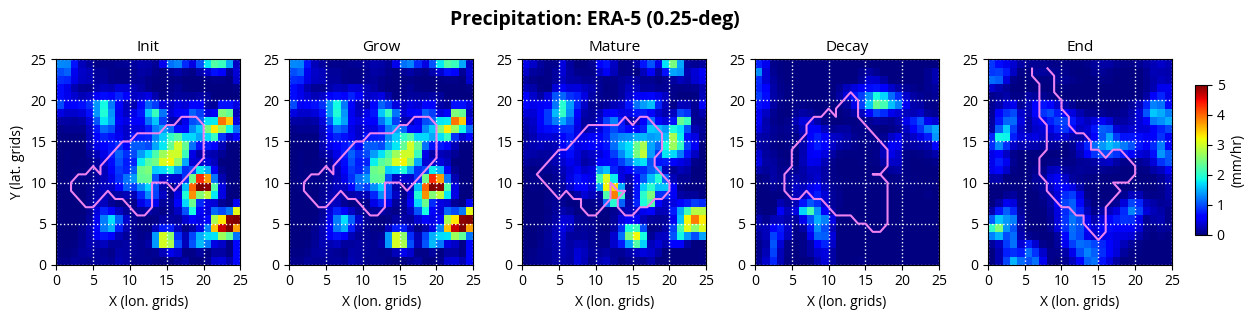

In [227]:
fig, ax = plt.subplots(1,5,figsize=(12,3))

for n,phase in enumerate(prec_gpm_compos.mcs_phase.values):
    
    cp = ax[n].pcolormesh(data_merged_fnl_xr.mtpr.sel(mcs_phase=phase).isel(tracks=track_sel)
                          , vmin=0, vmax=5, cmap='jet')
    # add composite mask position
    ax[n].contour(data_merged_fnl_xr.cloudtracknumber_nomergesplit.sel(mcs_phase=phase).isel(tracks=track_sel)
                  , levels=[0,1], colors=['violet'], zorder=2)
    ax[n].set_title('{}'.format(phase),fontsize=11)
    ax[n].set_xlabel('X (lon. grids)')
    
    if n == 0:
        ax[n].set_ylabel('Y (lat. grids)')
        
    ax[n].set_xticks(np.arange(0,30,5))
    ax[n].grid(linestyle=':', linewidth=1, color='w')
    
    if n == 4:
        cbaxes = fig.add_axes([1, 0.3, 0.01, 0.5])
        cbar = plt.colorbar(cp,cbaxes)
        cbar.set_label('(mm/hr)')
    
plt.tight_layout()
plt.suptitle('Precipitation: ERA-5 (0.25-deg)',fontsize=14, fontweight='bold', y=1.05)

In [246]:
data_track_phase

<xarray.Dataset>
Dimensions:                  (mcs_phase: 5, tracks: 1348, mergers: 50, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 55 59 161 171 ... 33633 33639 33648
    times                    (mcs_phase, tracks) int64 5 10 9 16 ... 18 14 14 11
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * nmaxpf                   (nmaxpf) int64 0 1 2
  * mcs_phase                (mcs_phase) object 'Init' 'Grow' ... 'Decay' 'End'
Data variables: (12/61)
    track_duration           (mcs_phase, tracks) int32 24 31 18 23 ... 17 17 13
    start_status             (mcs_phase, tracks) float64 1.0 1.0 1.0 ... 1.0 1.0
    end_status               (mcs_phase, tracks) float64 3.0 3.0 0.0 ... 0.0 0.0
    start_basetime           (mcs_phase, tracks) datetime64[ns] 2014-01-01T05...
    end_basetime             (mcs_phase, tracks) datetime64[ns] 2014-01-02T04...
    start_split_cloudnumber  (mcs_phase, tracks) float64 nan nan nan ... nan nan
    ...                       ...
    idt_mcs_init             (mcs_phase, tracks) int64 5 10 9 16 7 ... 5 6 6 7 7
    idt_mcs_grow             (mcs_phase, tracks) int64 10 11 10 17 9 ... 8 7 8 7
    idt_mcs_mature           (mcs_phase, tracks) int64 15 13 12 18 ... 11 9 10 8
    idt_mcs_decay            (mcs_phase, tracks) int64 17 21 13 18 ... 11 12 9
    idt_mcs_end              (mcs_phase, tracks) int64 19 29 14 19 ... 14 14 11
    mean_total_rain_era5     (mcs_phase, tracks) float64 1.111 0.2743 ... 0.43
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Wed Mar  9 15:26:04 2022
    startdate:                   20140101.0000
    enddate:                     20150101.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

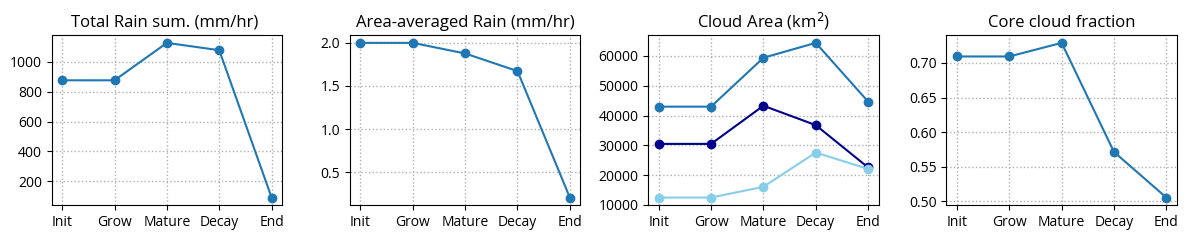

In [250]:
# plot total precip, area-averaged precip, area at MCS phases, core cloud fraction
fig,ax = plt.subplots(1,4,figsize=(12,2.5))

ax[0].plot(data_track_phase.mcs_phase, data_track_phase.total_rain.isel(tracks=track_sel), 
         marker='o')
ax[1].plot(data_track_phase.mcs_phase, (data_track_phase.total_rain/(data_track_phase.area/100)).isel(tracks=track_sel), 
         marker='o')
# area, cold_area, core_area
ax[2].plot(data_track_phase.mcs_phase, data_track_phase.ccs_area.isel(tracks=track_sel), 
         marker='o')
ax[2].plot(data_track_phase.mcs_phase, data_track_phase.core_area.isel(tracks=track_sel), 
         marker='o', color='darkblue')
ax[2].plot(data_track_phase.mcs_phase, data_track_phase.cold_area.isel(tracks=track_sel), 
         marker='o', color='skyblue')

ax[3].plot(data_track_phase.mcs_phase, (data_track_phase.core_area/data_track_phase.ccs_area).isel(tracks=track_sel), 
         marker='o');
ax[0].set_title('Total Rain sum. (mm/hr) ')
ax[1].set_title('Area-averaged Rain (mm/hr)')
ax[2].set_title('Cloud Area (km$^2$)')
ax[3].set_title('Core cloud fraction')
for n in range(4):
    ax[n].grid(linestyle=':', linewidth=1)

plt.tight_layout()

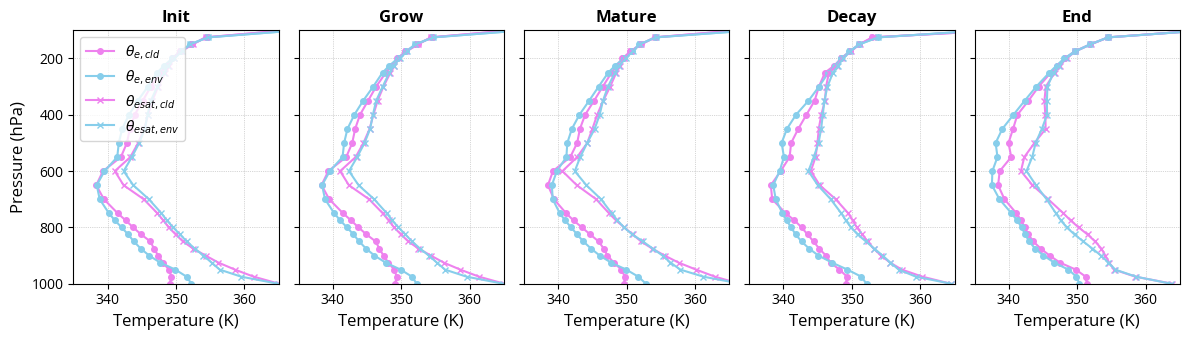

In [228]:
# use one example track to demonstrate the above analyses?

fig, ax = plt.subplots(1,5,figsize=(12,3.5))

ccolors = ['k','orange','r','skyblue','grey']

for p, phase in enumerate(data_test.mcs_phase.values):
    
    thetae_in = data_merged_inside.thetae.sel(mcs_phase = phase).isel(tracks=track_sel)
    thetae_sat_in = data_merged_inside.thetae_sat.sel(mcs_phase = phase).isel(tracks=track_sel)
    #thetae_bd = data_merged_boundary.thetae.sel(mcs_phase = phase).mean('tracks')
    thetae_out = data_merged_outside.thetae.sel(mcs_phase = phase).isel(tracks=track_sel)
    thetae_sat_out = data_merged_outside.thetae_sat.sel(mcs_phase = phase).isel(tracks=track_sel)
    
    ax[p].plot(thetae_in, thetae_in.level, color='violet', marker='o', markersize=4, label=r'$\theta_{e,cld}$')
    #ax[p].plot(thetae_bd, thetae_bd.level, color='grey', marker='o', markersize=4)
    ax[p].plot(thetae_out, thetae_out.level, color='skyblue', marker='o', markersize=4, label=r'$\theta_{e,env}$')
    # thetae_sat inside/outside MCS
    ax[p].plot(thetae_sat_in, thetae_sat_in.level, color='violet', marker='x', markersize=4, label=r'$\theta_{esat, cld}$')
    ax[p].plot(thetae_sat_out, thetae_sat_out.level, color='skyblue', marker='x', markersize=4, label=r'$\theta_{esat, env}$')

    if p == 0:
        ax[p].set_ylabel('Pressure (hPa)', fontsize=12)
        ax[p].legend(loc=2, fontsize=10)
        ax[p].set_yticks([1000,800,600,400,200])
    else:
        ax[p].set_yticks([1000,800,600,400,200])
        ax[p].set_yticklabels([])

    ax[p].set_ylim([1000,100])
    ax[p].set_xlim([335,365])
    ax[p].grid(linestyle=':', linewidth=0.5)
    ax[p].set_xlabel('Temperature (K)', fontsize=12)
    ax[p].set_title(phase, fontsize=12, fontweight='bold')
    
plt.tight_layout()

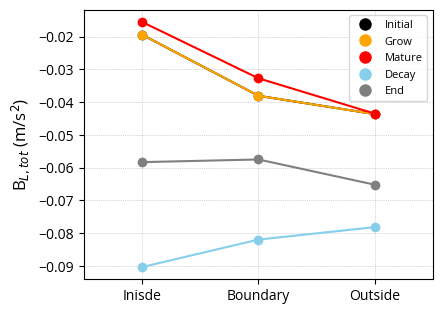

In [231]:
fig = plt.figure(figsize=(4.5,3.5))

ccolors = ['k','orange','r','skyblue','grey']

for p, phase in enumerate(data_test.mcs_phase.values):
    
    BL_in = data_merged_inside.BL_TOT.sel(mcs_phase = phase).isel(tracks=track_sel)
    BL_bd = data_merged_boundary.BL_TOT.sel(mcs_phase = phase).isel(tracks=track_sel)
    BL_out = data_merged_outside.BL_TOT.sel(mcs_phase = phase).isel(tracks=track_sel)
    
    plt.plot([0,1,2], [BL_in, BL_bd, BL_out], color=ccolors[p], marker='o')
    #plt.scatter(1, BL_bd, color=ccolors[p])
    #plt.scatter(2, BL_out, color=ccolors[p])
        
plt.xticks([0,1,2],['Inisde','Boundary','Outside'])
plt.xlim([-0.5,2.5]);
plt.ylabel('B$_{L,tot}$ (m/s$^2$)', fontsize=12)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Initial',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Grow',
                          markerfacecolor='orange', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Mature',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Decay',
                          markerfacecolor='skyblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='End',
                          markerfacecolor='grey', markersize=10),]

plt.legend(handles=legend_elements, loc=1, fontsize=8)
plt.grid(linestyle=':', linewidth=0.5)

In [ ]:
# separating into different MCS types: short-lived, long-lived

